In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
city_data=pd.read_csv('raw_data/city_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data=pd.read_csv('raw_data/ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
combine_data=pd.merge(city_data, ride_data, how="right", on=["city","city"])
combine_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [10]:
urban_cities = combine_data[combine_data["type"] == "Urban"]
suburban_cities = combine_data[combine_data["type"] == "Suburban"]
rural_cities = combine_data[combine_data["type"] == "Rural"]


In [12]:
suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

urban_avg_fare=urban_cities.groupby('city').mean()['fare']
urban_ride_count=urban_cities.groupby('city').count()['ride_id']
urban_driver_count=urban_cities.groupby('city').mean()['driver_count']

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig1.png'

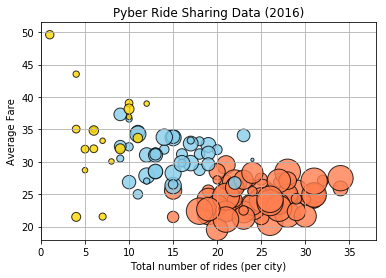

In [23]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            urban_driver_count*10,
            marker='o', edgecolor='black',linewidths=1,
            alpha=0.8, c='coral', label='Urban')

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            suburban_driver_count*10,  
            marker='o', edgecolor='black',linewidths=1, 
            alpha=0.8, c='skyblue',label='Suburban')

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            rural_driver_count*10,
            marker='o', edgecolor='black', linewidths=1, 
            alpha=0.8,c='gold',label='Rural')


plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare')
plt.xlabel('Total number of rides (per city)')
plt.xlim((0,38))
plt.grid(True)

plt.savefig("analysis/Fig1.png")
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig2.png'

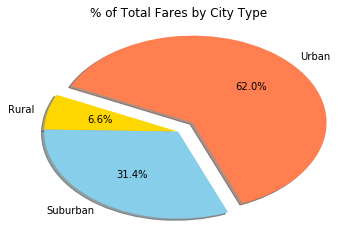

In [38]:
#calculate the percentage of fares by city type
percent_by_type = combine_data.groupby(["type"]).sum()["fare"]/combine_data["fare"].sum() *100
plt.pie(percent_by_type,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","skyblue","coral"],
       explode=[0,0,0.15],
       autopct='%1.1f%%',
       shadow=True,startangle=155)

plt.title("% of Total Fares by City Type")
plt.savefig("analysis/Fig2.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig3.png'

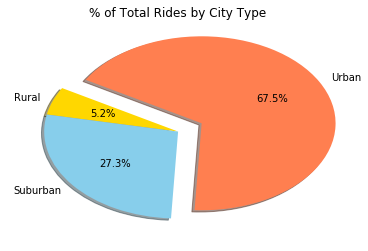

In [31]:
percent_by_ride = 100 * combine_data.groupby(["type"]).count()["ride_id"] / combine_data["ride_id"].count()

plt.pie(percent_by_ride, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.2], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")
plt.savefig("analysis/Fig3.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig4.png'

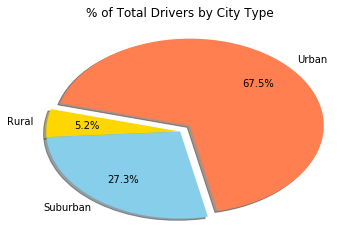

In [35]:
percent_by_driver = 100 * combine_data.groupby(["type"]).count()["ride_id"] / combine_data["ride_id"].count()

plt.pie(percent_by_driver, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "skyblue", "coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)

plt.title("% of Total Drivers by City Type")
plt.savefig("analysis/Fig4.png")
plt.show()